In [7]:
import numpy as nm
import pandas as pd
from sklearn.model_selection import train_test_split
import random
import xgboost as xgb
import datetime as dt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

In [8]:
labels= pd.read_csv("train_labels.csv")
labels

,customer_ID,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0
3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,0
4,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,0
...,...,...
458908,ffff41c8a52833b56430603969b9ca48d208e7c192c6a4...,0
458909,ffff518bb2075e4816ee3fe9f3b152c57fc0e6f01bf7fd...,0
458910,ffff9984b999fccb2b6127635ed0736dda94e544e67e02...,0
458911,ffffa5c46bc8de74f5a4554e74e239c8dee6b9baf38814...,1


In [10]:

final_data=pd.DataFrame()
data= pd.read_csv('train_data.csv',nrows=1000000)
data["S_2"]=pd.to_datetime(data["S_2"])
data["Year-Month"] = data["S_2"].dt.to_period('M')
data1=data.groupby('customer_ID').apply(lambda x: x.sample(n=1)).reset_index(drop = True)
final_data=pd.concat([final_data,pd.merge(labels,data1, how= 'inner', on='customer_ID')])



final_data.to_csv("Final_data-Step3.csv")




In [11]:
data

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,Year-Month
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938469,0.001733,0.008724,1.006838,0.009228,0.124035,0.008771,0.004709,...,NaN,NaN,0.002427,0.003706,0.003818,NaN,0.000569,0.000610,0.002674,2017-03
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936665,0.005775,0.004923,1.000653,0.006151,0.126750,0.000798,0.002714,...,NaN,NaN,0.003954,0.003167,0.005032,NaN,0.009576,0.005492,0.009217,2017-04
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0.954180,0.091505,0.021655,1.009672,0.006815,0.123977,0.007598,0.009423,...,NaN,NaN,0.003269,0.007329,0.000427,NaN,0.003429,0.006986,0.002603,2017-05
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06-13,0.960384,0.002455,0.013683,1.002700,0.001373,0.117169,0.000685,0.005531,...,NaN,NaN,0.006117,0.004516,0.003200,NaN,0.008419,0.006527,0.009600,2017-06
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07-16,0.947248,0.002483,0.015193,1.000727,0.007605,0.117325,0.004653,0.009312,...,NaN,NaN,0.003671,0.004946,0.008889,NaN,0.001670,0.008126,0.009827,2017-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2e3fabd8551cfbb7819ffc99cf22d4335953e4d911b7ea...,2017-12-01,0.444918,0.214272,0.509806,0.024078,0.001514,0.386644,0.001295,0.920215,...,NaN,NaN,0.000700,0.004486,0.006241,NaN,0.001294,0.006138,0.004346,2017-12
999996,2e3fabd8551cfbb7819ffc99cf22d4335953e4d911b7ea...,2018-01-01,0.445380,0.182068,0.511427,0.025369,0.008337,0.372405,0.002628,0.933117,...,NaN,NaN,0.007064,0.005506,0.005020,NaN,0.006667,0.004177,0.004452,2018-01
999997,2e3fabd8551cfbb7819ffc99cf22d4335953e4d911b7ea...,2018-02-28,0.439738,0.155119,0.497809,0.023311,0.000641,0.389353,0.009791,0.917929,...,NaN,NaN,0.002184,0.004863,0.007474,NaN,0.004654,0.005166,0.000017,2018-02
999998,2e3fabd8551cfbb7819ffc99cf22d4335953e4d911b7ea...,2018-03-31,0.449821,0.155417,0.501278,0.025809,0.006869,0.367082,0.001196,0.926053,...,NaN,NaN,0.000752,0.004426,0.005118,NaN,0.002986,0.000797,0.006316,2018-03


In [12]:
new_Data= final_data[final_data["Year-Month"]=="2018-03"]
print(len(new_Data))
Default_rate = nm.mean(new_Data['target'])
print(Default_rate)

8294
0.28900409934892696


In [13]:
final_data.shape

(82975, 192)

In [14]:
nm.mean(final_data['target'])

0.260825549864417

In [15]:
dtypes=final_data.dtypes

dtypelist = list()

for col in dtypes.index:
    if dtypes[col] == 'object':
        dtypelist.append(col)
        
print(dtypelist)

# final_data['D_63'].value_counts()
# final_data['D_64'].value_counts()


['customer_ID', 'D_63', 'D_64']


In [16]:
size = final_data.size
size

15931200

In [17]:
#One hot encoding

one_hot = pd.get_dummies(final_data[['D_63', 'D_64']])

# Combine the one hot encoded data with the original dataframe
final_data = pd.concat([final_data, one_hot], axis=1)

# Drop the original categorical columns
final_data.drop(['D_63', 'D_64', 'customer_ID'], axis=1, inplace=True)

In [18]:

from sklearn.preprocessing import OrdinalEncoder
for col in['B_30','B_38','D_114','D_116','D_117','D_120','D_126','D_66','D_68']:
    col_dummies=pd.get_dummies(final_data[col],prefix=col)
    final_data=pd.concat([final_data,col_dummies],axis=1)
    final_data.drop(col,axis=1,inplace=True)


In [19]:
final_data.shape

(82975, 225)

In [20]:
# pd.set_option('display.max_columns',None)
# final_data.head()

In [21]:
final_data

,target,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_126_1.0,D_66_0.0,D_66_1.0,D_68_0.0,D_68_1.0,D_68_2.0,D_68_3.0,D_68_4.0,D_68_5.0,D_68_6.0
0,0,2017-10-08,0.914767,0.003029,0.014324,1.000242,0.000263,0.108115,0.009527,0.007836,...,1,0,0,0,0,0,0,0,0,1
1,0,2017-10-20,0.916234,0.038577,0.011442,1.008145,0.006165,0.123016,0.007951,0.012861,...,1,0,0,0,0,0,0,0,0,1
2,0,2017-08-12,0.902419,0.005366,0.003352,0.811922,0.004008,NaN,0.008727,0.006270,...,1,0,0,0,0,0,0,0,0,1
3,0,2017-06-24,0.581547,0.093481,0.172628,1.003796,0.009453,0.153152,0.003694,0.002178,...,1,0,0,0,0,0,0,0,0,1
4,0,2017-03-30,0.936842,0.006574,0.003433,0.818691,0.007243,0.166190,0.008265,0.005927,...,1,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82970,1,2017-09-21,0.526971,0.391097,1.147700,0.029161,0.505075,0.170628,0.002073,0.815925,...,1,0,0,0,0,0,0,1,0,0
82971,1,2017-03-04,0.361247,0.003664,0.540647,0.029331,0.006139,0.171937,0.009884,0.966011,...,0,0,0,0,0,0,1,0,0,0
82972,0,2017-12-31,0.198252,0.007571,0.195269,0.070871,0.500145,1.228382,0.006453,0.196501,...,0,0,0,0,0,0,0,0,0,1
82973,1,2017-08-01,0.412000,0.186327,0.518099,0.028191,0.008652,0.448854,0.003659,0.883213,...,1,0,0,0,0,0,0,0,1,0


In [22]:
# dtypes=final_data.dtypes

# dtypelist1 = list()

# for col in dtypes.index:
#     if dtypes[col] == 'object':
#         dtypelist1.append(col)
        
# print(dtypelist1)

# final_data['D_64'].value_counts()

In [23]:
final_data.dtypes

final_data.replace('', nm.nan, inplace=True)


In [24]:
final_data.to_csv("XGBoost_Input_final.csv")

In [25]:
final_data.shape

(82975, 225)

In [26]:
value = final_data['D_42'][1]

print(value)

nan


In [27]:
final_data['Year-Month']

0        2017-10
1        2017-10
2        2017-08
3        2017-06
4        2017-03
          ...   
82970    2017-09
82971    2017-03
82972    2017-12
82973    2017-08
82974    2017-03
Name: Year-Month, Length: 82975, dtype: period[M]

In [28]:
#test-train-test split

train_start_date = '2017-05'
train_end_date = '2018-01'

# Define the start and end dates for the test 1 set
test_start_date = '2017-03'
test_end_date = '2017-04'

# Define the start and end dates for the test 2 setYear-Month
test1_start_date = '2018-02'
test1_end_date = '2018-03'

# Split the data into training and test sets
train_final_data = final_data[(final_data['Year-Month'] >= train_start_date) & (final_data['Year-Month'] <= train_end_date)]
test_final_data = final_data[(final_data['Year-Month'] >= test_start_date) & (final_data['Year-Month'] <= test_end_date)]
test2_final_data = final_data[(final_data['Year-Month'] >= test1_start_date) & (final_data['Year-Month'] <= test1_end_date) ]         

In [29]:
test_final_data['Year-Month'].max()

train_final_data.shape

(56085, 225)

In [30]:
test_final_data['Year-Month']

4        2017-03
12       2017-04
30       2017-04
45       2017-03
48       2017-04
          ...   
82936    2017-03
82961    2017-03
82968    2017-03
82971    2017-03
82974    2017-03
Name: Year-Month, Length: 11074, dtype: period[M]

In [31]:
test2_final_data['Year-Month']

5        2018-03
7        2018-02
10       2018-03
20       2018-02
24       2018-03
          ...   
82938    2018-03
82942    2018-03
82943    2018-02
82944    2018-03
82964    2018-03
Name: Year-Month, Length: 15816, dtype: period[M]

In [32]:
print(sum(train_final_data["target"])/(len(train_final_data["target"])))

0.260925381117946


In [33]:
train_final_data.shape

train_final_data['target'].dtypes


dtype('int64')

In [34]:
lentrain=len(train_final_data)
DR1 = sum(train_final_data['target'])/lentrain
print(sum(train_final_data['target']))
print("Length of train:",lentrain)
print("Default Rate of train:",DR1)
print("shape: ",train_final_data.shape)

14634
Length of train: 56085
Default Rate of train: 0.260925381117946
shape:  (56085, 225)


In [35]:
lentest=len(test_final_data)
DR2 = sum(test_final_data['target'])/lentest

print("Length of train:",lentest)
print("Default Rate of train:",DR2)
print(sum(test_final_data['target']))
print("shape: ",test_final_data.shape)


Length of train: 11074
Default Rate of train: 0.23026909878995847
2550
shape:  (11074, 225)


In [36]:
lentest1=len(test2_final_data)
DR3 = sum(test2_final_data['target'])/lentest1

print("Length of train:",lentest1)
print("Default Rate of train:",DR3)
print(sum(test2_final_data['target']))
print("Shape: ",test2_final_data.shape)

Length of train: 15816
Default Rate of train: 0.281866464339909
4458
Shape:  (15816, 225)


In [37]:
display(train_final_data)

,target,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_126_1.0,D_66_0.0,D_66_1.0,D_68_0.0,D_68_1.0,D_68_2.0,D_68_3.0,D_68_4.0,D_68_5.0,D_68_6.0
0,0,2017-10-08,0.914767,0.003029,0.014324,1.000242,0.000263,0.108115,0.009527,0.007836,...,1,0,0,0,0,0,0,0,0,1
1,0,2017-10-20,0.916234,0.038577,0.011442,1.008145,0.006165,0.123016,0.007951,0.012861,...,1,0,0,0,0,0,0,0,0,1
2,0,2017-08-12,0.902419,0.005366,0.003352,0.811922,0.004008,NaN,0.008727,0.006270,...,1,0,0,0,0,0,0,0,0,1
3,0,2017-06-24,0.581547,0.093481,0.172628,1.003796,0.009453,0.153152,0.003694,0.002178,...,1,0,0,0,0,0,0,0,0,1
6,0,2017-11-10,0.407172,0.001548,0.106145,0.048557,0.001353,0.330037,0.009187,0.223204,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82967,0,2017-09-23,0.582709,0.151803,0.023002,0.363210,0.004527,0.135678,0.006028,0.113819,...,1,0,0,0,0,0,0,0,0,1
82969,0,2017-10-28,0.980917,0.003129,0.003447,0.817724,0.007400,NaN,0.000120,0.002996,...,1,0,1,0,0,0,0,1,0,0
82970,1,2017-09-21,0.526971,0.391097,1.147700,0.029161,0.505075,0.170628,0.002073,0.815925,...,1,0,0,0,0,0,0,1,0,0
82972,0,2017-12-31,0.198252,0.007571,0.195269,0.070871,0.500145,1.228382,0.006453,0.196501,...,0,0,0,0,0,0,0,0,0,1


In [38]:

# Extract the input features and target variable from the training data
X_train = train_final_data.drop(columns=['target','S_2', 'Year-Month'])
y_train = train_final_data[['target']]

# Extract the input features and target variable from the test data
X_test = test_final_data.drop(columns=['target','S_2', 'Year-Month'])
y_test = test_final_data[['target']]

# Extract the input features and target variable from the test data 1
X_test1 = test2_final_data.drop(columns=['target','S_2', 'Year-Month'])
y_test1 = test2_final_data[['target']]

# Define the XGBoost model
model = xgb.XGBClassifier(random_state=52)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the accuracy of the model on the test data
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test data:", accuracy)

# Make predictions on the test data 1
y_pred1 = model.predict(X_test1)

# Evaluate the accuracy of the model on the test data 1
accuracy1 = accuracy_score(y_test1, y_pred1)
print("Accuracy on test data 1:", accuracy1)



Accuracy on test data: 0.8577749683944375
Accuracy on test data 1: 0.8672230652503794


In [39]:
X_test1.columns

Index(['P_2', 'D_39', 'B_1', 'B_2', 'R_1', 'S_3', 'D_41', 'B_3', 'D_42',
       'D_43',
       ...
       'D_126_1.0', 'D_66_0.0', 'D_66_1.0', 'D_68_0.0', 'D_68_1.0', 'D_68_2.0',
       'D_68_3.0', 'D_68_4.0', 'D_68_5.0', 'D_68_6.0'],
      dtype='object', length=222)

In [40]:
X_test1['D_45']

5        0.341221
7        0.343405
10       0.011603
20       0.005583
24       0.057041
           ...   
82938    0.057730
82942    0.164878
82943    0.004998
82944    0.068766
82964    0.145624
Name: D_45, Length: 15816, dtype: float64

In [41]:
X_test['D_45']

4        0.288640
12       0.044370
30       0.716313
45       0.044813
48       0.423460
           ...   
82936    0.151347
82961    0.001834
82968    0.226046
82971    0.062246
82974    0.561051
Name: D_45, Length: 11074, dtype: float64

In [42]:
y_test1['target']

5        0
7        0
10       1
20       1
24       0
        ..
82938    1
82942    0
82943    0
82944    0
82964    0
Name: target, Length: 15816, dtype: int64

In [43]:
#Feature_Importance
importance = model.feature_importances_

print(importance)

feature_importance_df = pd.DataFrame(list(zip(X_train.columns, importance)), columns=['feature', 'importance'])

# sort the dataframe in descending order of importance
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# print the dataframe
print(feature_importance_df)

feature_importance_df.to_csv("Feature_Importance_1.csv")


[0.19529964 0.00357317 0.02349611 0.01426548 0.01023252 0.00817671
 0.00505972 0.01215326 0.01626677 0.00713931 0.00963548 0.00821662
 0.01047207 0.00467154 0.00237206 0.00594337 0.00317727 0.00286431
 0.00722439 0.00422461 0.01236444 0.0032475  0.006846   0.00603535
 0.03677182 0.00448085 0.00434847 0.00379842 0.00292519 0.0033124
 0.00376451 0.01153794 0.00281728 0.00291302 0.00264936 0.00550299
 0.00290901 0.00415417 0.0036565  0.00503186 0.00236975 0.00275981
 0.00274502 0.00317975 0.00340457 0.00270554 0.00248568 0.00682858
 0.00293963 0.003318   0.0048914  0.00281734 0.00363149 0.00366059
 0.00449178 0.00309588 0.00311857 0.00296748 0.00241004 0.0023128
 0.00263503 0.00227761 0.00252188 0.00315037 0.00322282 0.00301707
 0.00474688 0.00318086 0.00488993 0.00265271 0.00236389 0.00518901
 0.0050202  0.00341147 0.00257915 0.00293856 0.00288618 0.00248357
 0.00247893 0.00289184 0.00272169 0.0035771  0.00274735 0.00275871
 0.00249904 0.00291754 0.00282544 0.0027309  0.00349592 0.002783

In [44]:
X_train.shape

(56085, 222)

In [45]:
# set the hyperparameters
params = {
    'n_estimators': 300,
    'learning_rate': 0.5,
    'max_depth': 4,
    'subsample': 0.5,
    'colsample_bytree': 0.5,
    'scale_pos_weight': 5
}

# create the XGBClassifier object with the hyperparameters
model1 = xgb.XGBClassifier(**params)

# train the model on the training set
model1.fit(X_train, y_train)

# # make predictions on the test set
# y_pred = model.predict(X_test)

# print(y_pred)

importance = model1.feature_importances_

print(importance)



[0.11435741 0.00417073 0.00996759 0.00560674 0.00601637 0.01182482
 0.0045665  0.01633865 0.01857115 0.0068975  0.00878654 0.00835608
 0.0072865  0.00437105 0.0032565  0.00517483 0.00568074 0.01480329
 0.00805926 0.00391224 0.00685652 0.00650577 0.00613736 0.00503519
 0.00364023 0.00652186 0.0075416  0.00384579 0.00468549 0.00461364
 0.00465331 0.00686116 0.00391689 0.00384663 0.00430737 0.00385863
 0.0031795  0.00698501 0.00391972 0.00580948 0.00458642 0.00302938
 0.0044362  0.00462693 0.00426224 0.00443329 0.00441366 0.00688628
 0.0038335  0.00370847 0.00553779 0.00405438 0.00469897 0.00849709
 0.00424993 0.00346325 0.00516567 0.00408058 0.00411679 0.00373181
 0.00323365 0.00440148 0.00379282 0.00379576 0.00371984 0.00366482
 0.00440151 0.01090955 0.00445057 0.00358133 0.00387696 0.00373562
 0.0053369  0.00323621 0.0031235  0.00435324 0.00436911 0.0040825
 0.00387448 0.00408505 0.00367904 0.00441429 0.00366237 0.00367007
 0.00385797 0.00370176 0.0042344  0.00372454 0.00372602 0.00378

In [46]:
feature_importance = pd.DataFrame(list(zip(X_train.columns, importance)), columns=['feature', 'importance'])

# sort the dataframe in descending order of importance
feature_importance = feature_importance_df.sort_values(by='importance', ascending=False)

# print the dataframe
print(feature_importance)

       feature  importance
0          P_2    0.195300
24         B_9    0.036772
191   B_38_2.0    0.024679
2          B_1    0.023496
8         D_42    0.016267
..         ...         ...
208  D_120_0.0    0.000000
207  D_117_6.0    0.000000
206  D_117_5.0    0.000000
105       B_31    0.000000
185     D_64_R    0.000000

[222 rows x 2 columns]


In [47]:
feature_importance.to_csv("Feature_Importance2.csv")

In [48]:
df_selected_features = set(feature_importance[feature_importance['importance'] > 0.005]['feature']) | set(feature_importance_df[feature_importance_df['importance']> 0.005]['feature'])
df_selected_features= list(df_selected_features)
df_selected_features



['D_42',
 'B_11',
 'D_43',
 'D_111',
 'D_76',
 'D_50',
 'S_3',
 'R_27',
 'D_75',
 'D_132',
 'P_2',
 'D_56',
 'B_3',
 'D_61',
 'D_68_6.0',
 'D_41',
 'B_4',
 'R_1',
 'B_38_2.0',
 'D_64_O',
 'B_9',
 'D_44',
 'D_49',
 'S_7',
 'D_45',
 'B_38_1.0',
 'D_46',
 'D_51',
 'B_7',
 'D_66_1.0',
 'B_1',
 'B_2']

In [49]:
# Subset X_train to include only selected features
X_train_selected = X_train[df_selected_features]
X_test_selected= X_test[df_selected_features]
X_test1_selected= X_test1[df_selected_features]

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 300],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.5, 0.8],
    'colsample_bytree': [0.5, 1.0],
    'scale_pos_weight': [1, 5, 10]
}

# Create an XGBoost classifier object
xgb_model = xgb.XGBClassifier(random_state=52,objective='binary:logistic', eval_metric='auc')

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, n_jobs=-1,scoring='roc_auc')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_selected, y_train)




GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='auc', feature_types=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=52, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.5, 1.0],
                         'learning_rate': [0.01, 0.1],
                         'n_estimators': [50, 100, 300],
                         'scale_pos_weight': [1, 5, 10],
                         'subsample': [0.5, 0.8]},
             scoring='roc_auc')

In [50]:
train= []
test1=[]
test2=[]
t=[]
l=[]
s=[]
c=[]
w=[]
scores =pd.DataFrame()

# Create an XGBoost classifier object
for trees in [50,100,300]:
    for LR in [0.01, 0.1]:
        for subsample in [0.5,0.8]:
            for colsample in [0.5,1]:
                for weight in [1,5,10]:
                    model_xgb_test= xgb.XGBClassifier(n_estimators=trees, learning_rate=LR, subsample=subsample,colsample_bytree=colsample, min_child_weight=weight, random_state=42)
                    model_xgb_test.fit(X_train_selected, y_train)
                    t.append(trees)
                    l.append(LR)
                    s.append(subsample)
                    c.append(colsample)
                    w.append(weight)
                    train.append(roc_auc_score(y_train, model_xgb_test.predict(X_train_selected)))
                    test1.append(roc_auc_score(y_test, model_xgb_test.predict(X_test_selected)))
                    test2.append(roc_auc_score(y_test1, model_xgb_test.predict(X_test1_selected)))
scores['trees'] = t
scores['Learning rate'] = l
scores['subsample'] = s
scores['percentage features'] = c
scores['Weight of default'] = w
scores['AUC train 1'] = train
scores['AUC test 1'] = test1
scores['AUC test 2'] = test2
scores.to_csv('XGBoost_scores.csv')

In [51]:
scores

,trees,Learning rate,subsample,percentage features,Weight of default,AUC train 1,AUC test 1,AUC test 2
0,50,0.01,0.5,0.5,1,0.819958,0.767956,0.838234
1,50,0.01,0.5,0.5,5,0.819550,0.768251,0.837946
2,50,0.01,0.5,0.5,10,0.818822,0.767505,0.838326
3,50,0.01,0.5,1.0,1,0.826975,0.780243,0.842538
4,50,0.01,0.5,1.0,5,0.825081,0.779008,0.842070
...,...,...,...,...,...,...,...,...
67,300,0.10,0.8,0.5,5,0.884105,0.788484,0.853582
68,300,0.10,0.8,0.5,10,0.878935,0.787151,0.854651
69,300,0.10,0.8,1.0,1,0.904683,0.786877,0.854310
70,300,0.10,0.8,1.0,5,0.891807,0.784270,0.853229


In [52]:
print(grid_search.cv_results_.keys())

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_colsample_bytree', 'param_learning_rate', 'param_n_estimators', 'param_scale_pos_weight', 'param_subsample', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])


In [53]:

# print(grid_search.best_params_)
# print(grid_search.best_estimator_)
print(grid_search.best_score_)
# print(grid_search.scorer_)

0.9283956563283684


In [54]:
grid_search.cv_results_

{'mean_fit_time': array([  9.90142622,  10.51634398,   8.18343058,   9.65488772,
          8.2871736 ,   9.39626207,  17.32175198,  19.38958654,
         16.60126138,  19.23902316,  16.78626361,  19.50815911,
         49.48196087,  59.80672708,  50.62471724,  60.41369972,
         51.99013486,  61.80595174,   8.65359945,  10.28657184,
          8.96045637,  10.29040694,   8.90948067,  10.3947372 ,
         18.14866471,  20.89854202,  17.30193348,  20.17032084,
         17.13451605,  20.50468903,  50.66764359,  59.33878078,
         52.44863524,  60.85768862,  53.10395551,  62.02272458,
         16.34134679,  19.66045794,  16.82054081,  19.96646848,
         16.73774452,  20.01092134,  32.61804166,  38.96613188,
         32.54674296,  37.57594481,  30.6085835 ,  35.02290449,
         82.56529803,  96.84005551,  84.50857077, 103.56782069,
         86.17584858, 102.58142581,  13.89977551,  16.56805153,
         14.31884799,  17.14910502,  14.37033052,  17.18001261,
         27.73091764,  

In [55]:
#Normalization of data for Neural Networks

from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

sc.fit(X_train_selected)

StandardScaler()

In [56]:

results = grid_search.cv_results_
for i in range(len(results['params'])):
    print("Parameters",results['params'][i])
    print("AUC Score",results['mean_test_score'][i])
    


Parameters {'colsample_bytree': 0.5, 'learning_rate': 0.01, 'n_estimators': 50, 'scale_pos_weight': 1, 'subsample': 0.5}
AUC Score 0.9216177364599503
Parameters {'colsample_bytree': 0.5, 'learning_rate': 0.01, 'n_estimators': 50, 'scale_pos_weight': 1, 'subsample': 0.8}
AUC Score 0.9213554628746057
Parameters {'colsample_bytree': 0.5, 'learning_rate': 0.01, 'n_estimators': 50, 'scale_pos_weight': 5, 'subsample': 0.5}
AUC Score 0.9187883506324533
Parameters {'colsample_bytree': 0.5, 'learning_rate': 0.01, 'n_estimators': 50, 'scale_pos_weight': 5, 'subsample': 0.8}
AUC Score 0.9189640038891664
Parameters {'colsample_bytree': 0.5, 'learning_rate': 0.01, 'n_estimators': 50, 'scale_pos_weight': 10, 'subsample': 0.5}
AUC Score 0.9168477840949821
Parameters {'colsample_bytree': 0.5, 'learning_rate': 0.01, 'n_estimators': 50, 'scale_pos_weight': 10, 'subsample': 0.8}
AUC Score 0.9173578064791712
Parameters {'colsample_bytree': 0.5, 'learning_rate': 0.01, 'n_estimators': 100, 'scale_pos_weight

In [57]:
results_df = pd.DataFrame({
    'params': results['params'],
    'auc_score': results['mean_test_score']
})

# Write the dataframe to a CSV file
results_df.to_csv('grid_search_results_xgb.csv', index=False)

results_df

,params,auc_score
0,"{'colsample_bytree': 0.5, 'learning_rate': 0.0...",0.921618
1,"{'colsample_bytree': 0.5, 'learning_rate': 0.0...",0.921355
2,"{'colsample_bytree': 0.5, 'learning_rate': 0.0...",0.918788
3,"{'colsample_bytree': 0.5, 'learning_rate': 0.0...",0.918964
4,"{'colsample_bytree': 0.5, 'learning_rate': 0.0...",0.916848
...,...,...
67,"{'colsample_bytree': 1.0, 'learning_rate': 0.1...",0.926585
68,"{'colsample_bytree': 1.0, 'learning_rate': 0.1...",0.924593
69,"{'colsample_bytree': 1.0, 'learning_rate': 0.1...",0.925353
70,"{'colsample_bytree': 1.0, 'learning_rate': 0.1...",0.922677


In [58]:
best_params = grid_search.best_params_
best_auc = grid_search.best_score_
print("Best AUC:", best_auc)
print("Best parameters:", best_params)


Best AUC: 0.9283956563283684
Best parameters: {'colsample_bytree': 0.5, 'learning_rate': 0.1, 'n_estimators': 100, 'scale_pos_weight': 1, 'subsample': 0.8}


In [59]:
#running xgb on hyper parameters
params = {
    'learning_rate': 0.1,
    'n_estimators': 100,
    'subsample': 0.8,
    'colsample_bytree': 0.5,
    'scale_pos_weight': 1
}

# Train the model
xgb_best_model = xgb.XGBClassifier(**params)
xgb_best_model.fit(X_train_selected, y_train)
# Evaluate the model
auc_score = roc_auc_score(y_test, xgb_best_model.predict_proba(X_test_selected)[:, 1])
print("AUC score on test data:", auc_score)

auc_score1 = roc_auc_score(y_test1, xgb_best_model.predict_proba(X_test1_selected)[:, 1])
print("AUC score on test 2 data:", auc_score1)





AUC score on test data: 0.9164585346104657
AUC score on test 2 data: 0.9403126032162916


In [60]:
#Rank ordering

perf_train_data = pd.DataFrame({"Actual": y_train['target'], "Prediction": xgb_best_model.predict_proba(X_train_selected)[:,1]})
quantiles = list(set(perf_train_data.Prediction.quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])))
quantiles.sort()
quantiles.insert(0,0)
quantiles.insert(len(quantiles),1)
perf_train_data["Score Bins"] = pd.cut(perf_train_data["Prediction"], quantiles)
stat = perf_train_data.groupby("Score Bins")["Actual"].agg(["sum", "count"])
stat["Bad Rate"] = stat["sum"] / stat["count"]
stat

,sum,count,Bad Rate
Score Bins,,,
"(0.0, 0.00295]",0,5609,0.000000
"(0.00295, 0.00551]",3,5608,0.000535
"(0.00551, 0.0116]",14,5609,0.002496
"(0.0116, 0.0254]",54,5608,0.009629
"(0.0254, 0.0631]",141,5609,0.025138
"(0.0631, 0.18]",459,5608,0.081847
"(0.18, 0.405]",1437,5608,0.256241
"(0.405, 0.636]",2907,5609,0.518274
"(0.636, 0.809]",4321,5608,0.770506


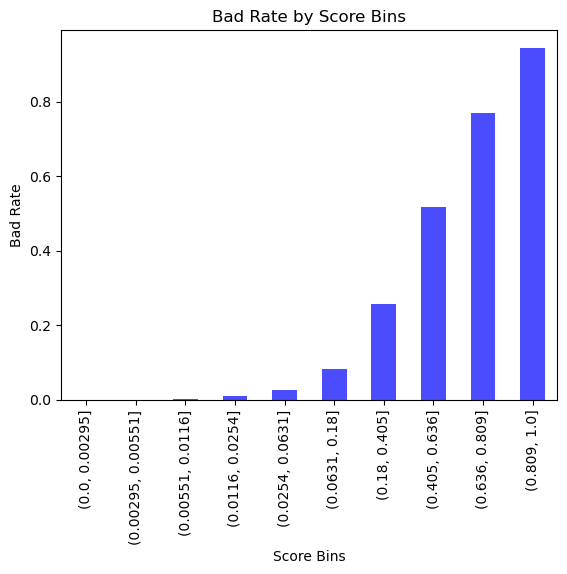

In [61]:
import matplotlib.pyplot as plt

ax = stat.plot(kind='bar', y='Bad Rate', color='blue', alpha=0.7, legend=False)
ax.set_xlabel("Score Bins")
ax.set_ylabel("Bad Rate")
ax.set_title("Bad Rate by Score Bins")

# display the chart
plt.show()

In [62]:
#Get summary stats

def get_summary_statistics(df, column_names):
    summary_stats = pd.DataFrame(columns=["Feature", "Minimum value", "Maximum value", "1 percentile", "5 percentile", "99 percentile", "95 percentile", "Median value", "Mean value", "Missing Value"])
    for column_name in column_names:
        summary_stats = summary_stats.append({
            "Feature": column_name,
            "Minimum value": df[column_name].min(),
            "Maximum value": df[column_name].max(),
            "1 percentile": df[column_name].quantile(0.01),
            "5 percentile": df[column_name].quantile(0.05),
            "99 percentile": df[column_name].quantile(0.99),
            "95 percentile": df[column_name].quantile(0.95),
            "Median value": df[column_name].median(),
            "Mean value": df[column_name].mean(),
            "Missing Value": df[column_name].isnull().sum() / len(df[column_name]) * 100
        }, ignore_index=True)
    return summary_stats

column_name_input = ['P_2','D_45','S_3','B_9','D_42','D_50']
get_summary_statistics(final_data,column_name_input)

/var/folders/zq/qtwpdq7n0g51j49ll8v0y0fm0000gn/T/ipykernel_89075/313019796.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_stats = summary_stats.append({
/var/folders/zq/qtwpdq7n0g51j49ll8v0y0fm0000gn/T/ipykernel_89075/313019796.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_stats = summary_stats.append({
/var/folders/zq/qtwpdq7n0g51j49ll8v0y0fm0000gn/T/ipykernel_89075/313019796.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_stats = summary_stats.append({
/var/folders/zq/qtwpdq7n0g51j49ll8v0y0fm0000gn/T/ipykernel_89075/313019796.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_stats = sum

,Feature,Minimum value,Maximum value,1 percentile,5 percentile,99 percentile,95 percentile,Median value,Mean value,Missing Value
0,P_2,-3.449725e-01,1.009983,0.003321,0.220188,1.005453,0.973728,0.680519,0.648729,1.223260
1,D_45,1.957037e-06,1.587912,0.002769,0.008228,0.991239,0.754802,0.153569,0.237261,0.075926
2,S_3,-2.981722e-01,3.001997,0.006186,0.063263,1.026904,0.621765,0.165875,0.231025,18.318771
3,B_9,7.369665e-09,16.337705,0.000233,0.001160,0.980781,0.650909,0.028521,0.192139,0.000000
4,D_42,-1.288134e-04,4.184169,0.002761,0.007196,1.064223,0.581998,0.116461,0.185158,81.284724
5,D_50,-3.127269e+00,103.544074,0.002443,0.026255,1.021171,0.448977,0.108477,0.176662,57.677614


In [63]:
print(X_test1_selected['D_45'])

5        0.341221
7        0.343405
10       0.011603
20       0.005583
24       0.057041
           ...   
82938    0.057730
82942    0.164878
82943    0.004998
82944    0.068766
82964    0.145624
Name: D_45, Length: 15816, dtype: float64


In [64]:
print(X_test_selected['D_45'])

4        0.288640
12       0.044370
30       0.716313
45       0.044813
48       0.423460
           ...   
82936    0.151347
82961    0.001834
82968    0.226046
82971    0.062246
82974    0.561051
Name: D_45, Length: 11074, dtype: float64


In [65]:
X_train_normalized = sc.transform(X_train_selected)
X_test_normalized = sc.transform(X_test_selected)
X_test1_normalized = sc.transform(X_test1_selected)

In [66]:
#convert to pandas DF
X_train_normalized = pd.DataFrame(X_train_normalized,columns=X_train_selected.columns)
X_test_normalized = pd.DataFrame(X_test_normalized,columns=X_test_selected.columns)
X_test1_normalized = pd.DataFrame(X_test1_normalized,columns=X_test1_selected.columns)

In [67]:
#Outlier Treatment
X_train_normalized.describe(percentiles=[0.01,0.99]).transpose()




,count,mean,std,min,1%,50%,99%,max
D_42,9933.0,7.618323e-17,1.000050,-0.782038,-0.770570,-0.274298,3.477164,16.641660
B_11,56085.0,-9.121704e-18,1.000009,-0.535171,-0.533639,-0.436022,4.299861,6.572764
D_43,38484.0,1.181653e-17,1.000013,-0.728187,-0.718188,-0.310237,3.918148,26.301728
D_111,294.0,-2.348839e-16,1.001705,-3.303942,-3.285493,0.467011,0.491116,0.491432
D_76,6171.0,-6.102538e-17,1.000081,-0.410572,-0.407692,-0.239867,2.455454,45.037409
D_50,23772.0,3.545690e-17,1.000021,-4.062059,-0.212578,-0.082668,1.025898,116.696469
S_3,45843.0,-1.277157e-16,1.000011,-2.684847,-1.144168,-0.331850,4.037320,14.055983
R_27,54504.0,1.684319e-16,1.000009,-2.846812,-2.779068,0.363116,0.380511,0.380850
D_75,56085.0,-5.859428e-17,1.000009,-0.767932,-0.766710,-0.433166,3.735301,10.351480
D_132,5476.0,1.148339e-16,1.000091,-0.919873,-0.849795,-0.192865,3.164588,18.403020


In [68]:
X_test_normalized.describe(percentiles=[0.01,0.99]).transpose()

,count,mean,std,min,1%,50%,99%,max
D_42,1582.0,-0.030055,0.868898,-0.777357,-0.772859,-0.307073,3.526690,6.635309
B_11,11074.0,-0.081738,0.901114,-0.535155,-0.533761,-0.458848,3.960098,6.718580
D_43,7716.0,-0.071513,0.887656,-0.728076,-0.715265,-0.336897,3.443387,20.793379
D_111,39.0,0.232900,0.769954,-3.295988,-2.580771,0.471710,0.490806,0.491547
D_76,1313.0,-0.011605,0.637529,-0.410457,-0.407165,-0.239737,2.546129,6.034348
D_50,4902.0,0.018714,1.853434,-2.188372,-0.212069,-0.079572,1.094767,127.143788
S_3,9002.0,-0.087194,0.906709,-1.938360,-1.134227,-0.357216,3.763187,9.233563
R_27,10930.0,0.061421,0.921826,-2.827753,-2.774738,0.363628,0.380539,0.380841
D_75,11074.0,-0.058240,0.946699,-0.767925,-0.766800,-0.439737,3.449678,8.841486
D_132,959.0,0.013754,1.049492,-0.881788,-0.850008,-0.175980,3.570273,14.860301


In [69]:
X_test1_normalized.describe(percentiles=[0.01,0.99]).transpose()

,count,mean,std,min,1%,50%,99%,max
D_42,4014.0,-0.028734,1.153102,-0.777833,-0.767168,-0.346582,3.829205,16.620764
B_11,15816.0,0.113100,1.171802,-0.535173,-0.533541,-0.416621,5.421855,7.961327
D_43,9916.0,0.070209,1.093784,-0.728190,-0.716133,-0.281843,4.470723,17.711115
D_111,122.0,-0.004278,0.951654,-3.299547,-3.277857,0.467029,0.490841,0.491309
D_76,1539.0,0.018311,0.862382,-0.410530,-0.407352,-0.224641,3.092357,18.351669
D_50,6443.0,-0.004548,0.497669,-0.747442,-0.212888,-0.082053,1.070860,24.589393
S_3,12930.0,0.058709,1.052094,-2.390151,-1.135176,-0.307924,4.178226,13.821362
R_27,12496.0,-0.030122,1.034728,-2.832005,-2.780872,0.362601,0.380486,0.380849
D_75,15816.0,0.038185,1.055218,-0.767918,-0.766650,-0.429731,4.030311,13.922930
D_132,1818.0,-0.038511,1.003641,-0.888563,-0.840151,-0.257162,2.538127,19.311683


In [70]:
# Get the 1st and 99th percentile values for each column
p1 = X_train_normalized.quantile(0.01)
p99 = X_train_normalized.quantile(0.99)

# Replace values outside the percentile range with the percentile value for each column
X_train_normalized = X_train_normalized.apply(lambda x: nm.where(x < p1[x.name], p1[x.name], x))
X_train_normalized = X_train_normalized.apply(lambda x: nm.where(x > p99[x.name], p99[x.name], x))

# Apply the same operation to the test data
X_test_normalized = X_test_normalized.apply(lambda x: nm.where(x < p1[x.name], p1[x.name], x))
X_test_normalized = X_test_normalized.apply(lambda x: nm.where(x > p99[x.name], p99[x.name], x))

#Apply to test2 data
X_test1_normalized = X_test1_normalized.apply(lambda x: nm.where(x < p1[x.name], p1[x.name], x))
X_test1_normalized = X_test1_normalized.apply(lambda x: nm.where(x > p99[x.name], p99[x.name], x))

In [71]:
X_train_normalized.describe(percentiles=[0.01,0.99]).transpose()

,count,mean,std,min,1%,50%,99%,max
D_42,9933.0,-2.606438e-02,0.815304,-0.770570,-0.770559,-0.274298,3.468615,3.477164
B_11,56085.0,-8.748910e-03,0.955494,-0.533639,-0.533639,-0.436022,4.299846,4.299861
D_43,38484.0,-2.237626e-02,0.829819,-0.718188,-0.718181,-0.310237,3.917057,3.918148
D_111,294.0,1.220905e-04,1.001290,-3.285493,-3.285366,0.467011,0.491097,0.491116
D_76,6171.0,-3.245639e-02,0.535601,-0.407692,-0.407681,-0.239867,2.455090,2.455454
D_50,23772.0,-2.427862e-02,0.193409,-0.212578,-0.212565,-0.082668,1.025715,1.025898
S_3,45843.0,-1.121856e-02,0.921911,-1.144168,-1.144058,-0.331850,4.036788,4.037320
R_27,54504.0,1.258205e-04,0.999652,-2.779068,-2.779067,0.363116,0.380510,0.380511
D_75,56085.0,-1.096201e-02,0.944739,-0.766710,-0.766710,-0.433166,3.735263,3.735301
D_132,5476.0,-3.636646e-02,0.711268,-0.849795,-0.849712,-0.192865,3.159070,3.164588


In [72]:
#Missing Value Imputation
X_train_normalized.fillna(0,inplace=True)
X_test_normalized.fillna(0,inplace=True)
X_test1_normalized.fillna(0,inplace=True)

In [73]:
X_train_normalized.isna().sum()

D_42        0
B_11        0
D_43        0
D_111       0
D_76        0
D_50        0
S_3         0
R_27        0
D_75        0
D_132       0
P_2         0
D_56        0
B_3         0
D_61        0
D_68_6.0    0
D_41        0
B_4         0
R_1         0
B_38_2.0    0
D_64_O      0
B_9         0
D_44        0
D_49        0
S_7         0
D_45        0
B_38_1.0    0
D_46        0
D_51        0
B_7         0
D_66_1.0    0
B_1         0
B_2         0
dtype: int64

In [74]:
#Neural Network-Grid search


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

# Define the neural network model
def create_model(hidden_layers=2, nodes_per_layer=4, activation='relu', dropout_rate=0.5):
    model = Sequential()
    for i in range(hidden_layers):
        if i == 0:
            model.add(Dense(nodes_per_layer, activation=activation, input_shape=(X_train_normalized.shape[1],)))
        else:
            model.add(Dense(nodes_per_layer, activation=activation))
        if dropout_rate > 0:
            model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create a KerasClassifier with default parameters
nn_model = KerasClassifier(build_fn=create_model, epochs=20, batch_size=32, verbose=0)

# Define the hyperparameters for the grid search
params = {
    'hidden_layers': [2, 4],
    'nodes_per_layer': [4, 6],
    'activation': ['relu', 'tanh'],
    'dropout_rate': [0,0.5],
    'batch_size': [100, 10000]
}

# Perform grid search
grid_search = GridSearchCV(nn_model, param_grid=params, cv=5, scoring='roc_auc')
grid_search.fit(X_train_normalized, y_train)

# Print the results
print("Best AUC:", grid_search.best_score_)
print("Best parameters:", grid_search.best_params_)

/var/folders/zq/qtwpdq7n0g51j49ll8v0y0fm0000gn/T/ipykernel_89075/1480584889.py:27: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  nn_model = KerasClassifier(build_fn=create_model, epochs=20, batch_size=32, verbose=0)
2023-04-21 20:21:52.281610: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


351/351 [==============================] - 0s 231us/step


351/351 [==============================] - 0s 247us/step
Best AUC: 0.9251069408755797
Best parameters: {'activation': 'relu', 'batch_size': 100, 'dropout_rate': 0, 'hidden_layers': 2, 'nodes_per_layer': 6}


In [75]:
results_nn = grid_search.cv_results_
for i in range(len(results_nn['params'])):
    print("Parameters",results_nn['params'][i])
    print("AUC Score",results_nn['mean_test_score'][i])

Parameters {'activation': 'relu', 'batch_size': 100, 'dropout_rate': 0, 'hidden_layers': 2, 'nodes_per_layer': 4}
AUC Score 0.9241706999777989
Parameters {'activation': 'relu', 'batch_size': 100, 'dropout_rate': 0, 'hidden_layers': 2, 'nodes_per_layer': 6}
AUC Score 0.9251069408755797
Parameters {'activation': 'relu', 'batch_size': 100, 'dropout_rate': 0, 'hidden_layers': 4, 'nodes_per_layer': 4}
AUC Score 0.9246773710789709
Parameters {'activation': 'relu', 'batch_size': 100, 'dropout_rate': 0, 'hidden_layers': 4, 'nodes_per_layer': 6}
AUC Score 0.9245448101912533
Parameters {'activation': 'relu', 'batch_size': 100, 'dropout_rate': 0.5, 'hidden_layers': 2, 'nodes_per_layer': 4}
AUC Score 0.9080084141527054
Parameters {'activation': 'relu', 'batch_size': 100, 'dropout_rate': 0.5, 'hidden_layers': 2, 'nodes_per_layer': 6}
AUC Score 0.9233261143772127
Parameters {'activation': 'relu', 'batch_size': 100, 'dropout_rate': 0.5, 'hidden_layers': 4, 'nodes_per_layer': 4}
AUC Score 0.8829740337

In [76]:
results_nn = pd.DataFrame({
    'params': results_nn['params'],
    'auc_score': results_nn['mean_test_score']
})

# Write the dataframe to a CSV file
results_nn.to_csv('grid_search_results_nn.csv', index=False)

results_nn

,params,auc_score
0,"{'activation': 'relu', 'batch_size': 100, 'dro...",0.924171
1,"{'activation': 'relu', 'batch_size': 100, 'dro...",0.925107
2,"{'activation': 'relu', 'batch_size': 100, 'dro...",0.924677
3,"{'activation': 'relu', 'batch_size': 100, 'dro...",0.924545
4,"{'activation': 'relu', 'batch_size': 100, 'dro...",0.908008
5,"{'activation': 'relu', 'batch_size': 100, 'dro...",0.923326
6,"{'activation': 'relu', 'batch_size': 100, 'dro...",0.882974
7,"{'activation': 'relu', 'batch_size': 100, 'dro...",0.922411
8,"{'activation': 'relu', 'batch_size': 10000, 'd...",0.843640
9,"{'activation': 'relu', 'batch_size': 10000, 'd...",0.854086


In [77]:
# Define the hyperparameters for the grid search

# Create empty lists to store results
results_train = []
results_test_1 = []
results_test_2 = []
h= []
nodes=[]
act=[]
drop=[]
batch=[]
scores_nn = pd.DataFrame()

# Nested for loop to iterate through hyperparameters
for hidden_layers in [2,4]:
    for nodes_per_layer in [4,6]:
        for activation in ['relu','tanh']:
            for dropout_rate in [0,0.5]:
                for batch_size in [100,10000]:
                    # Create the model with the current hyperparameters
                    model_nn_test = Sequential()
                    for i in range(hidden_layers):
                        if i == 0:
                            model_nn_test.add(Dense(nodes_per_layer, activation=activation, input_shape=(X_train_normalized.shape[1],)))
                        else:
                            model_nn_test.add(Dense(nodes_per_layer, activation=activation))
                        if dropout_rate > 0:
                            model_nn_test.add(Dropout(dropout_rate))
                    model_nn_test.add(Dense(1, activation='sigmoid'))
                    model_nn_test.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
                    
                    # Train the model on the training data
                    model_nn_test.fit(X_train_normalized, y_train, epochs=20, batch_size=batch_size, verbose=0)
                    
                    #creating lists
                    h.append(hidden_layers)
                    nodes.append(nodes_per_layer)
                    act.append(activation)
                    drop.append(dropout_rate)
                    batch.append(batch_size)
                    # Calculate AUC scores for the training data and the two test datasets
                    y_train_pred = model_nn_test.predict(X_train_normalized)
                    auc_train = roc_auc_score(y_train, y_train_pred)
                    
                    y_test_1_pred = model_nn_test.predict(X_test_normalized)
                    auc_test_1 = roc_auc_score(y_test, y_test_1_pred)
                    
                    y_test_2_pred = model_nn_test.predict(X_test1_normalized)
                    auc_test_2 = roc_auc_score(y_test1, y_test_2_pred)
                    
                    # Store the results in the lists
                    results_train.append(auc_train)
                    results_test_1.append(auc_test_1)
                    results_test_2.append(auc_test_2)

scores_nn['hidden_layers'] = h
scores_nn['nodes_per_layer'] = nodes
scores_nn['activation'] = act
scores_nn['dropout_rate'] = drop
scores_nn['batch_size'] = batch
scores_nn['AUC Train'] = results_train
scores_nn['AUC Test 1'] = results_test_1
scores_nn['AUC Test 2'] = results_test_2
scores_nn.to_csv("Neural_Network_Scores.csv")

495/495 [==============================] - 0s 227us/step


In [78]:
results_train

[0.9256448746485487,
 0.8517775237099553,
 0.9076961260875384,
 0.7895072323621357,
 0.9250451208765302,
 0.8943901217779076,
 0.9232583019862509,
 0.9029253736322393,
 0.9270290427929005,
 0.8726356683283285,
 0.9248268867456232,
 0.8802454963224212,
 0.9267591381815565,
 0.8970239125404772,
 0.9231747164158091,
 0.896466280027126,
 0.9265616246666917,
 0.882757996719433,
 0.9244042143685531,
 0.8397251958012492,
 0.9259118143439924,
 0.8703373589950869,
 0.9230966460670212,
 0.8608316498595253,
 0.9269267865774602,
 0.8918367777479291,
 0.9034920913007349,
 0.8300831054799173,
 0.926533433649536,
 0.8766281587972491,
 0.9229782934163004,
 0.8934242565307288]

In [79]:
results_test_1

[0.9105432872351192,
 0.8316738666372228,
 0.8995367865588282,
 0.7696619464303789,
 0.9097298515839936,
 0.8790480396757483,
 0.9076323368390059,
 0.8839697141174631,
 0.911975115245535,
 0.860566451357643,
 0.9101188340188258,
 0.865003404458921,
 0.9119042886981165,
 0.8833073858356107,
 0.9078638400456382,
 0.8791124943642402,
 0.9118946734019747,
 0.868011980014906,
 0.9094741491153008,
 0.8346185165760345,
 0.9105831976150385,
 0.8543424103569162,
 0.907867152492156,
 0.8414131494925516,
 0.9114467110166451,
 0.8713560327932206,
 0.8968715782887533,
 0.8161061501090348,
 0.9107032507982076,
 0.8572777670429973,
 0.9077892409896854,
 0.8815613814742227]

In [80]:
results_test_2

[0.9366888892996803,
 0.8696111566536643,
 0.9092149490804236,
 0.808402063879494,
 0.9356952084573112,
 0.902020104529047,
 0.9358103584384584,
 0.9132532463782611,
 0.9378334767548517,
 0.8805755954639459,
 0.9368152767972107,
 0.8902620778416637,
 0.9370015549246747,
 0.905618726592293,
 0.9355997191924378,
 0.9037853327067182,
 0.9374515888189201,
 0.8825677957980932,
 0.9361274084723051,
 0.8357263614596717,
 0.9364633983624114,
 0.8816857495099534,
 0.9354166503732553,
 0.8653259796132098,
 0.9374089297057603,
 0.9036879672308492,
 0.9025276294781107,
 0.8305776533711641,
 0.9376700785267374,
 0.8865424599188008,
 0.9353034259770774,
 0.89623078888313]

In [81]:
# Print the results
print("Best AUC:", grid_search.best_score_)
print("Best parameters:", grid_search.best_params_)

Best AUC: 0.9251069408755797
Best parameters: {'activation': 'relu', 'batch_size': 100, 'dropout_rate': 0, 'hidden_layers': 2, 'nodes_per_layer': 6}


In [82]:
#Best Neural Network
# Define the neural network model with the best parameters
model_best_nn = Sequential()
model_best_nn.add(Dense(6, activation='relu', input_shape=(X_train_normalized.shape[1],)))
model_best_nn.add(Dropout(0))
model_best_nn.add(Dense(6, activation='relu'))
model_best_nn.add(Dropout(0))
model_best_nn.add(Dense(1, activation='sigmoid'))

# Compile the model
model_best_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model on the training data
model_best_nn.fit(X_train_normalized, y_train, batch_size=100, epochs=20, verbose=0)

In [83]:
# Evaluate the model
y_pred_nn = model_best_nn.predict(X_test_normalized)



# Evaluate the model on the test data
loss, accuracy = model_best_nn.evaluate(X_test_normalized, y_test)
print(f"Test loss: {loss:.3f}")
print(f"Test accuracy: {accuracy:.3f}")


347/347 [==============================] - 0s 278us/step - loss: 0.3096 - accuracy: 0.8550
Test loss: 0.310
Test accuracy: 0.855


In [84]:
###Strategy#####
Default_rate_train = sum(y_train['target'])/(len(y_train['target']))
Default_rate_test= sum(y_test['target'])/(len(y_test['target']))
Default_rate_test1=sum(y_test1['target'])/(len(y_test1['target']))





print("Default rate for train data is : ",Default_rate_train)
print("Default rate for train data is : ",Default_rate_test)
print("Default rate for train data is : ",Default_rate_test1)

Default rate for train data is :  0.260925381117946
Default rate for train data is :  0.23026909878995847
Default rate for train data is :  0.281866464339909


In [85]:
y_test1.columns

Index(['target'], dtype='object')

In [86]:
Data_test1 = pd.DataFrame(y_test1[['target']])

Data_test1.to_csv("Probability_of_default.csv")



In [87]:
len(y_test1)

15816

In [88]:
# Data_test1=Data_test1.sort_values(1)

In [89]:
df_xgb = pd.DataFrame(xgb_best_model.predict_proba(X_test1_selected))

In [90]:
len(Data_test1)

15816

In [91]:
Data_test1.shape

(15816, 1)

In [92]:
df_xgb.shape

(15816, 2)

In [93]:
Data_test1 = Data_test1.reset_index(drop=True)
df_xgb = df_xgb.reset_index(drop=True)

In [94]:
df_new = pd.concat([Data_test1, df_xgb],axis=1)

In [95]:
len(df_new)
df_new.shape

(15816, 3)

In [96]:
default_testing_rate=df_new

In [97]:
from sklearn.metrics import roc_curve



fpr,tpr,threshold= roc_curve(nm.array(y_test1),xgb_best_model.predict(X_test1_selected))

In [98]:
youden_index = tpr-fpr
type(youden_index)

numpy.ndarray

In [99]:
nm.argmax(youden_index)

1

In [100]:
print(fpr,tpr,threshold)

[0.         0.11498503 1.        ] [0.         0.82413638 1.        ] [2 1 0]


In [101]:
threshold[nm.argmax(youden_index)]

1

In [102]:
y_test1['target']

5        0
7        0
10       1
20       1
24       0
        ..
82938    1
82942    0
82943    0
82944    0
82964    0
Name: target, Length: 15816, dtype: int64

In [103]:
import os
os.getcwd()

"/Users/sakshisaxena/Library/CloudStorage/OneDrive-TheUniversityofTexasatDallas/Spring'23/ML Project"

In [222]:
#Strategy

#def revenue(TH,x,y,TR):
def revenue(TH,x,y):
    df = pd.DataFrame(y)
    df['Prob of 1'] = xgb_best_model.predict_proba(x)[:, 1]
    df['Accepted_customers'] = (df['Prob of 1'] < TH).astype(int)
    df = df[df['Accepted_customers'] == 1]
    balance_feature = x['B_9']
    spend_feature = x['S_3']
    df['B9_Balance'] = balance_feature
    df['S3_Spend'] = spend_feature
    df = df.dropna()
    RR = nm.mean(df['target'])
    df = df.drop(df[df['target'] == 1].index)
    df = df.reset_index(drop=True)
    
    return((sum(df['B9_Balance'])*0.02) + (sum(df['S3_Spend'])*0.001),RR)


a,b = revenue(0.56734,X_test1_selected,y_test1)
print(a)
print(b)

18.674904971501203
0.09768023652490335


In [223]:
input_x = pd.concat([X_train_selected,X_test_selected,X_test1_selected])
input_y = pd.concat([y_train,y_test,y_test1])

In [224]:
pip install shap


[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [225]:
import shap
shap.initjs()
explainer = shap.Explainer(xgb_model)
shap_values = explainer(X_test1)
shap.plots.beeswarm(shap_values)


TypeError: The passed model is not callable and cannot be analyzed directly with the given masker! Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=52, ...)

In [269]:
#Profit Function 

def calculate_profit(TH, x, y, LGD):
    df4 = pd.DataFrame(y)
    df4['Prob of 1'] = xgb_best_model.predict_proba(x)[:, 1]
    df4['Accepted_customers'] = (df4['Prob of 1'] < TH).astype(int)
    df4 = df4[df4['Accepted_customers'] == 1]
    balance_feature = x['B_9']
    spend_feature = x['S_3']
    df4['B9_Balance'] = balance_feature
    df4['S3_Spend'] = spend_feature
    df4 = df4.dropna()
    RR = nm.mean(df4['target'])
    revenue = (sum(df4['B9_Balance']) * 0.02) + (sum(df4['S3_Spend']) * 0.001)
    cost = sum(df4[df4['target'] == 1]['B9_Balance']) * LGD
    profit = revenue - cost
    df4 = df4.drop(df4[df4['target'] == 1].index)
    df4 = df4.reset_index(drop=True)
    num_accepted_customers = df4['Accepted_customers'].count()
    return profit




In [270]:
TH= 0.56734
LGD = {}
il = []
p = []

for i in nm.arange(0.01,1,0.001):
    il.append(i*100)
    p.append(calculate_profit(TH, X_test1_selected, y_test1, i))
LGD['percentage'] = il
LGD['profit'] = p

print(LGD)
# LGD = 0.9
# test=pd.DataFrame()
# # Calculate profit and response rate for your strategy using the test set.
# profit1, response_rate1,revenue,length= calculate_profit(TH, X_test1_selected, y_test1, LGD)

# # Print the results.
# print("Profit: $%.2f" % profit1)
# print("Response rate: %.2f%%" % (response_rate1 * 100))
# print("Revenue: ",revenue)
# print("Customers Accepted ",length)


{'percentage': [1.0, 1.0999999999999999, 1.2, 1.2999999999999998, 1.3999999999999997, 1.4999999999999996, 1.5999999999999994, 1.6999999999999995, 1.7999999999999996, 1.8999999999999992, 1.9999999999999991, 2.099999999999999, 2.1999999999999993, 2.299999999999999, 2.3999999999999986, 2.4999999999999987, 2.5999999999999988, 2.6999999999999984, 2.7999999999999985, 2.8999999999999986, 2.9999999999999987, 3.0999999999999983, 3.199999999999998, 3.299999999999998, 3.399999999999998, 3.4999999999999973, 3.599999999999998, 3.6999999999999975, 3.799999999999998, 3.8999999999999977, 3.9999999999999973, 4.099999999999997, 4.1999999999999975, 4.299999999999997, 4.399999999999997, 4.499999999999997, 4.599999999999997, 4.6999999999999975, 4.799999999999996, 4.899999999999997, 4.9999999999999964, 5.099999999999996, 5.199999999999997, 5.299999999999996, 5.399999999999997, 5.4999999999999964, 5.599999999999996, 5.699999999999996, 5.799999999999996, 5.899999999999996, 5.999999999999996, 6.099999999999996

In [271]:
LGD = pd.DataFrame(LGD)
LGD.sort_values(by = 'profit',ascending= False)

#LGD=1-RecoveryRate

,percentage,profit
0,1.0,21.123768
1,1.1,20.901008
2,1.2,20.678248
3,1.3,20.455487
4,1.4,20.232727
...,...,...
985,99.5,-198.295066
986,99.6,-198.517826
987,99.7,-198.740586
988,99.8,-198.963347


In [272]:
LGD.to_csv("LGD.csv")